In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
data=pd.read_csv("/Users/aayushjain/codes/project/Fino/project 4/dataset_linkedin-post-search-scraper_2024-02-27_11-24-18-305.csv")

In [91]:
data2=pd.read_csv("/Users/aayushjain/codes/project/Fino/project 4/dataset_linkedin-post-search-scraper_2024-03-03_17-22-37-254.csv")

In [92]:
dataset = pd.concat([data, data2], axis=0, ignore_index=True)


In [93]:
dataset['authorFullName'].unique()
dataset['postedAtISO'] = pd.to_datetime(dataset['postedAtISO'])
dataset['day'] = dataset['postedAtISO'].dt.day_name()
dataset['hour'] = dataset['postedAtISO'].dt.hour

In [94]:
dataset.head()

,authorFollowersCount,authorFullName,authorProfileId,authorProfileUrl,authorType,commentsCount,image,isRepost,likesCount,postedAtISO,postedAtTimestamp,text,timeSincePosted,title,url,urn,day,hour
0,297K,Airtel Payments Bank,airtelpaymentsbank,https://www.linkedin.com/company/airtelpayment...,Company,9,https://media.licdn.com/dms/image/D4D22AQFGNLA...,False,287,2023-09-07 10:53:47.693000+00:00,1694084027693,#AirtelPaymentsBank is the first bank in India...,6mo,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7105503413689331712,Thursday,10
1,297K,Airtel Payments Bank,airtelpaymentsbank,https://www.linkedin.com/company/airtelpayment...,Company,3,NaN,False,155,2023-09-05 08:09:56.464000+00:00,1693901396464,Here’s a glimpse of #AirtelPaymentsBank- India...,6mo,Face Authentication For AePS,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7104737402795024384,Tuesday,8
2,297K,Airtel Payments Bank,airtelpaymentsbank,https://www.linkedin.com/company/airtelpayment...,Company,5,https://media.licdn.com/dms/image/D4D22AQGpVAb...,False,230,2023-09-06 12:40:25.601000+00:00,1694004025601,"“With the rise of digital India, and smartphon...",6mo,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7105167860594802688,Wednesday,12
3,297K,Airtel Payments Bank,airtelpaymentsbank,https://www.linkedin.com/company/airtelpayment...,Company,4,NaN,False,229,2023-11-24 10:15:34.620000+00:00,1700820934620,"Our MD and CEO, Anubrata Biswas, had an intera...",3mo,Anubrata Biswas at IMT Ghaziabad,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7133760049360887808,Friday,10
4,297K,Airtel Payments Bank,airtelpaymentsbank,https://www.linkedin.com/company/airtelpayment...,Company,0,NaN,False,68,2023-11-24 08:05:03.108000+00:00,1700813103108,“Customers of tomorrow are priortising simplic...,3mo,Ganesh Ananthanarayanan at the #DATE,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7133727201618780160,Friday,8


In [95]:
dataset.groupby(['authorFollowersCount', 'authorFullName']).size().reset_index(name='counts')

,authorFollowersCount,authorFullName,counts
0,105K,Fino Payments Bank Ltd,55
1,121K,Suryoday Small Finance Bank Ltd,105
2,290K,Jana Small Finance Bank,104
3,297K,Airtel Payments Bank,189
4,56K,India Post Payments Bank,74
5,589K,AU SMALL FINANCE BANK,162


In [96]:
dataset=dataset.drop(['authorProfileId','authorType','postedAtTimestamp','authorFollowersCount','authorProfileUrl'],axis=1)

In [97]:
dataset.head()

,authorFullName,commentsCount,image,isRepost,likesCount,postedAtISO,text,timeSincePosted,title,url,urn,day,hour
0,Airtel Payments Bank,9,https://media.licdn.com/dms/image/D4D22AQFGNLA...,False,287,2023-09-07 10:53:47.693000+00:00,#AirtelPaymentsBank is the first bank in India...,6mo,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7105503413689331712,Thursday,10
1,Airtel Payments Bank,3,NaN,False,155,2023-09-05 08:09:56.464000+00:00,Here’s a glimpse of #AirtelPaymentsBank- India...,6mo,Face Authentication For AePS,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7104737402795024384,Tuesday,8
2,Airtel Payments Bank,5,https://media.licdn.com/dms/image/D4D22AQGpVAb...,False,230,2023-09-06 12:40:25.601000+00:00,"“With the rise of digital India, and smartphon...",6mo,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7105167860594802688,Wednesday,12
3,Airtel Payments Bank,4,NaN,False,229,2023-11-24 10:15:34.620000+00:00,"Our MD and CEO, Anubrata Biswas, had an intera...",3mo,Anubrata Biswas at IMT Ghaziabad,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7133760049360887808,Friday,10
4,Airtel Payments Bank,0,NaN,False,68,2023-11-24 08:05:03.108000+00:00,“Customers of tomorrow are priortising simplic...,3mo,Ganesh Ananthanarayanan at the #DATE,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7133727201618780160,Friday,8


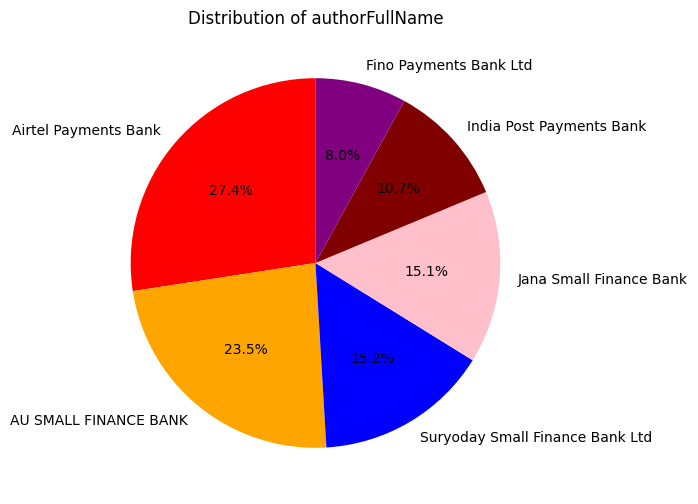

In [98]:
author_counts = dataset['authorFullName'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(author_counts, labels=author_counts.index, autopct='%1.1f%%', startangle=90,colors=['red','orange','blue','pink','maroon','purple','yellow'])
plt.title('Distribution of authorFullName')
plt.show()

In [99]:
dataset.head()

,authorFullName,commentsCount,image,isRepost,likesCount,postedAtISO,text,timeSincePosted,title,url,urn,day,hour
0,Airtel Payments Bank,9,https://media.licdn.com/dms/image/D4D22AQFGNLA...,False,287,2023-09-07 10:53:47.693000+00:00,#AirtelPaymentsBank is the first bank in India...,6mo,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7105503413689331712,Thursday,10
1,Airtel Payments Bank,3,NaN,False,155,2023-09-05 08:09:56.464000+00:00,Here’s a glimpse of #AirtelPaymentsBank- India...,6mo,Face Authentication For AePS,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7104737402795024384,Tuesday,8
2,Airtel Payments Bank,5,https://media.licdn.com/dms/image/D4D22AQGpVAb...,False,230,2023-09-06 12:40:25.601000+00:00,"“With the rise of digital India, and smartphon...",6mo,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7105167860594802688,Wednesday,12
3,Airtel Payments Bank,4,NaN,False,229,2023-11-24 10:15:34.620000+00:00,"Our MD and CEO, Anubrata Biswas, had an intera...",3mo,Anubrata Biswas at IMT Ghaziabad,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7133760049360887808,Friday,10
4,Airtel Payments Bank,0,NaN,False,68,2023-11-24 08:05:03.108000+00:00,“Customers of tomorrow are priortising simplic...,3mo,Ganesh Ananthanarayanan at the #DATE,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7133727201618780160,Friday,8


In [100]:
dataset.groupby('authorFullName').describe()

commentsCount                                  \
                                        count       mean        std  min  25%   
authorFullName                                                                  
AU SMALL FINANCE BANK                   162.0  18.154321  59.623620  0.0  3.0   
Airtel Payments Bank                    189.0   5.412698   7.036308  0.0  1.0   
Fino Payments Bank Ltd                   55.0   6.709091  20.794117  0.0  1.0   
India Post Payments Bank                 74.0   4.202703  17.399401  0.0  1.0   
Jana Small Finance Bank                 104.0  17.894231  88.556703  1.0  2.0   
Suryoday Small Finance Bank Ltd         105.0  10.361905  38.057933  0.0  1.0   

                                                   likesCount              \
                                 50%    75%    max      count        mean   
authorFullName                                                              
AU SMALL FINANCE BANK            7.0  15.75  735.0      162.0  402.327160   
Airtel Payments Bank             4.0   7.00   53.0      189.0  180.037037   
Fino Payments Bank Ltd           3.0   5.00  155.0       55.0  147.363636   
India Post Payments Bank         2.0   2.00  150.0       74.0   45.324324   
Jana Small Finance Bank          4.0   8.00  820.0      104.0  244.769231   
Suryoday Small Finance Bank Ltd  2.0   5.00  326.0      105.0  171.942857   

                                 ...                  hour            \
                                 ...    75%     max  count      mean   
authorFullName                   ...                                   
AU SMALL FINANCE BANK            ...  504.0  2755.0  162.0  9.111111   
Airtel Payments Bank             ...  195.0  3268.0  189.0  7.264550   
Fino Payments Bank Ltd           ...  196.0   875.0   55.0  8.054545   
India Post Payments Bank         ...   38.5   675.0   74.0  8.391892   
Jana Small Finance Bank          ...  261.0  2626.0  104.0  6.653846   
Suryoday Small Finance Bank Ltd  ...  166.0  1252.0  105.0  8.457143   

                                                                      
                                      std  min  25%  50%   75%   max  
authorFullName                                                        
AU SMALL FINANCE BANK            3.708309  3.0  6.0  9.5  12.0  19.0  
Airtel Payments Bank             2.484818  2.0  5.0  7.0   9.0  17.0  
Fino Payments Bank Ltd           4.079843  2.0  5.0  9.0  12.0  15.0  
India Post Payments Bank         3.078060  2.0  7.0  8.0  10.0  17.0  
Jana Small Finance Bank          3.622393  2.0  4.0  6.0   9.0  15.0  
Suryoday Small Finance Bank Ltd  4.076265  0.0  6.0  8.0  12.0  23.0  

[6 rows x 24 columns]

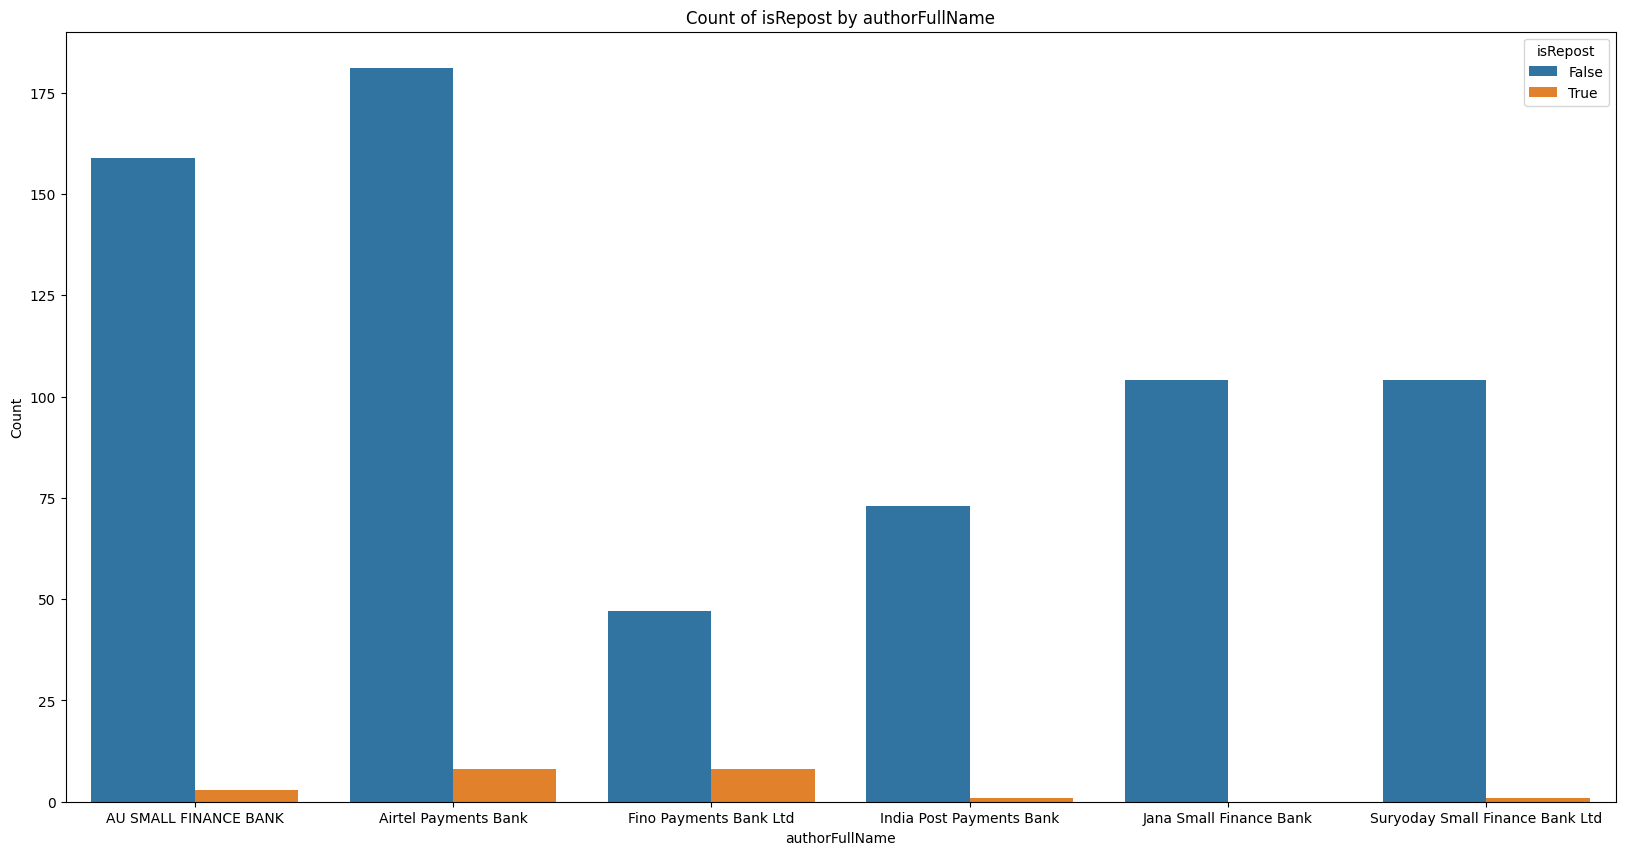

In [101]:
plt.figure(figsize=(20, 10))
grouped_data = dataset.groupby(['authorFullName', 'isRepost']).size().reset_index(name='count')
sns.barplot(x='authorFullName', y='count', hue='isRepost', data=grouped_data)
plt.title('Count of isRepost by authorFullName')
plt.xlabel('authorFullName')
plt.ylabel('Count')
plt.show()

In [102]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def analyze_hashtags(df):
    # Concatenate all captions into a single string
    all_captions = ' '.join(df['text'].astype(str))

    # Extract hashtags using regular expression
    hashtags = re.findall(r'#\w+', all_captions)

    # Count the occurrences of each hashtag
    hashtags_counter = Counter(hashtags)
    hashtags_dict = dict(hashtags_counter)
    print(hashtags_dict)

    # Get the top 5 most common hashtags
    top_5_frequencies = hashtags_counter.most_common(5)
    print(top_5_frequencies)

    # Filter hashtags with count greater than 5
    top_5_frequencies = {k: v for k, v in hashtags_dict.items() if v > 10}

    # Create lists for plotting
    words = list(top_5_frequencies.keys())
    counts = list(top_5_frequencies.values())

    # Plot the bar chart
    plt.figure(figsize=(20,10))
    plt.bar(words, counts, color='pink')
    plt.xlabel('Hashtags')
    plt.xticks(rotation=90)
    plt.ylabel('Counts')
    plt.title('Hashtags Counts (Count > 5)')
    plt.show()

    # Generate and plot the WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        min_word_length=3,
        max_words=100,
        collocations=False
    ).generate(all_captions)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


{'#AirtelPaymentsBank': 178, '#DigitalFirst': 9, '#DigitalPayments': 7, '#GFF2023': 14, '#GFF': 13, '#Innovation': 13, '#Launch': 2, '#fastag': 1, '#FaceAuthentication': 5, '#SafestDigitalAccount': 58, '#FinancialInclusion': 13, '#Payments': 10, '#Fintech': 22, '#GlobalFintechFest2023': 12, '#AePS': 2, '#PaymentsBanks': 1, '#DigitalBank': 86, '#LeadersTalk': 2, '#YoungBanker': 1, '#FinancialServices': 3, '#BFSI': 16, '#MarketingLeaders': 1, '#WomenAtBank': 29, '#LeadersSpeak': 3, '#ContentMarketing': 1, '#Banking': 40, '#Security': 1, '#VCCircle': 1, '#InTheNews': 1, '#Profitable': 8, '#FinTech': 1, '#FTX2024': 1, '#FutureOfPayments': 1, '#AirtelSafePay': 45, '#airtelThanks': 51, '#PaymentsSoRewarding': 1, '#Growth': 4, '#SkipTheFraud': 7, '#WorkJourney': 7, '#Diversity': 8, '#Inclusion': 10, '#Womenleaders': 1, '#Campushiring': 1, '#EmpoweringSuccess': 1, '#CareerJourney': 1, '#Dedication': 1, '#GreatPlaceToWork': 26, '#DateWithTech2023': 1, '#FiresideChat': 1, '#B2B': 5, '#Lending': 

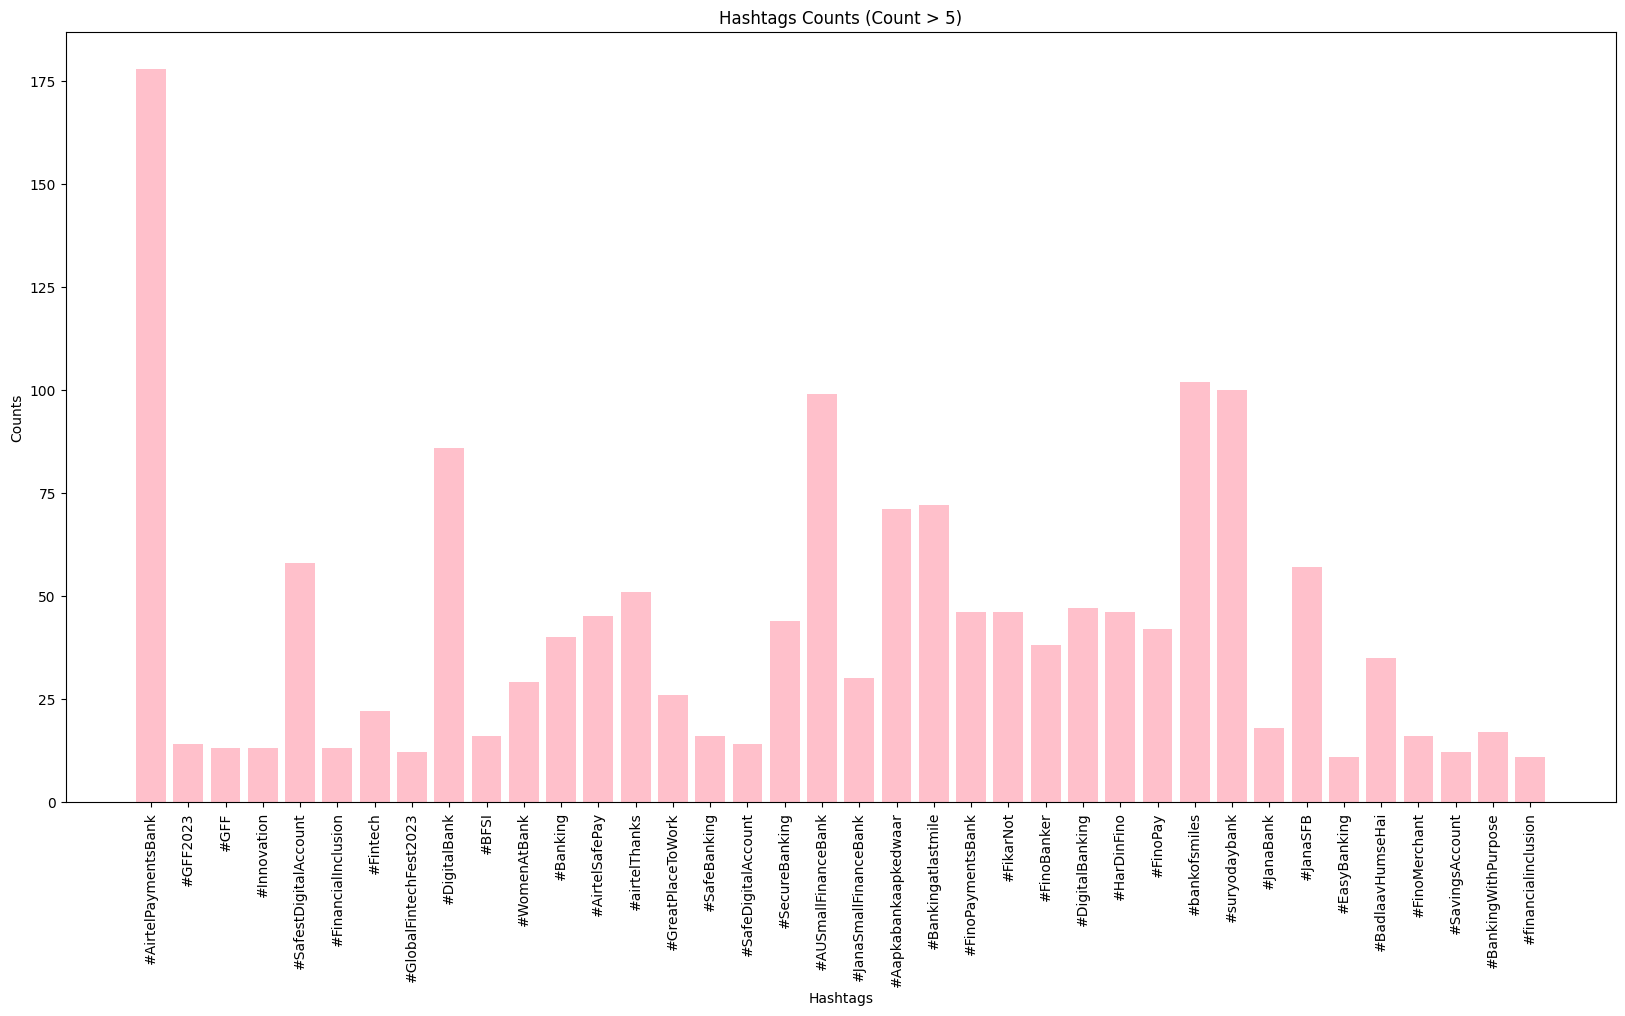

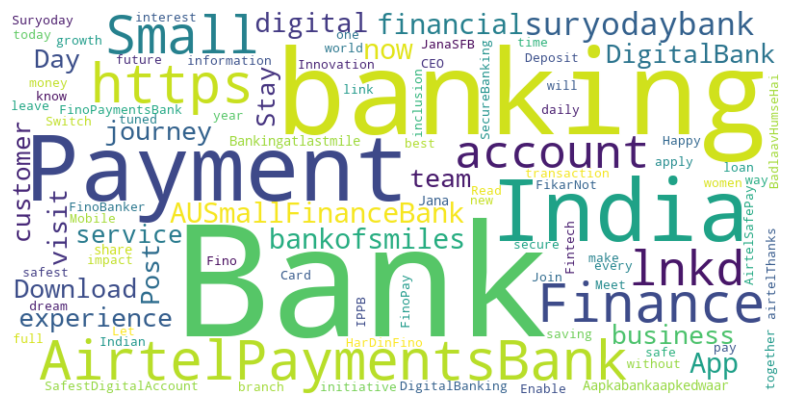

In [103]:
analyze_hashtags(dataset)

In [104]:
dataset_jsb=dataset[dataset['authorFullName']=='Jana Small Finance Bank']
dataset_apb=dataset[dataset['authorFullName']=='Airtel Payments Bank']
dataset_au=dataset[dataset['authorFullName']=='AU SMALL FINANCE BANK']
dataset_ippb=dataset[dataset['authorFullName']=='India Post Payments Bank']
dataset_ssb=dataset[dataset['authorFullName']=='Suryoday Small Finance Bank Ltd']
dataset_fino=dataset[dataset['authorFullName']=='Fino Payments Bank Ltd']


array(['Airtel Payments Bank', 'AU SMALL FINANCE BANK',
       'Jana Small Finance Bank', 'India Post Payments Bank',
       'Fino Payments Bank Ltd', 'Suryoday Small Finance Bank Ltd'],

{'#JanaSmallFinanceBank': 30, '#JanaApp': 1, '#MobileBanking': 2, '#InternetBanking': 2, '#JanaBank': 18, '#JanaSFB': 57, '#Banking': 37, '#BikeLoans': 5, '#TwoWheelerLoans': 5, '#EasyLoans': 10, '#FixedDeposits': 4, '#InterestRate': 6, '#HigherReturns': 5, '#Investments': 3, '#EasyBanking': 11, '#FinancialGoals': 4, '#GuruPurnima': 1, '#Guidance': 1, '#Saving': 4, '#Interest': 8, '#MomsMoneyMantras': 2, '#mothersday': 2, '#mothers': 2, '#motherslove': 2, '#financialfreedom': 2, '#financialwisdom': 2, '#money': 2, '#moneymantras': 2, '#SecuredBanking': 7, '#NRIFixedDeposits': 1, '#Investment': 5, '#NRI': 2, '#5YearsOfJanaBank': 2, '#Agraga': 2, '#RuPay': 1, '#DebitCards': 2, '#MSME': 1, '#MSMEDay': 1, '#GoldLoans': 2, '#MaximizeValue': 2, '#CashForGold': 2, '#FlexibleFinancing': 2, '#FinanceSector': 2, '#FixedDeposit': 6, '#Profit': 4, '#Returns': 4, '#FathersDay': 2, '#SavingsAccount': 2, '#Savings': 5, '#Earnings': 3, '#HighReturns': 1, '#GoldLoan': 1, '#SelectDebitCard': 1, '#Republ

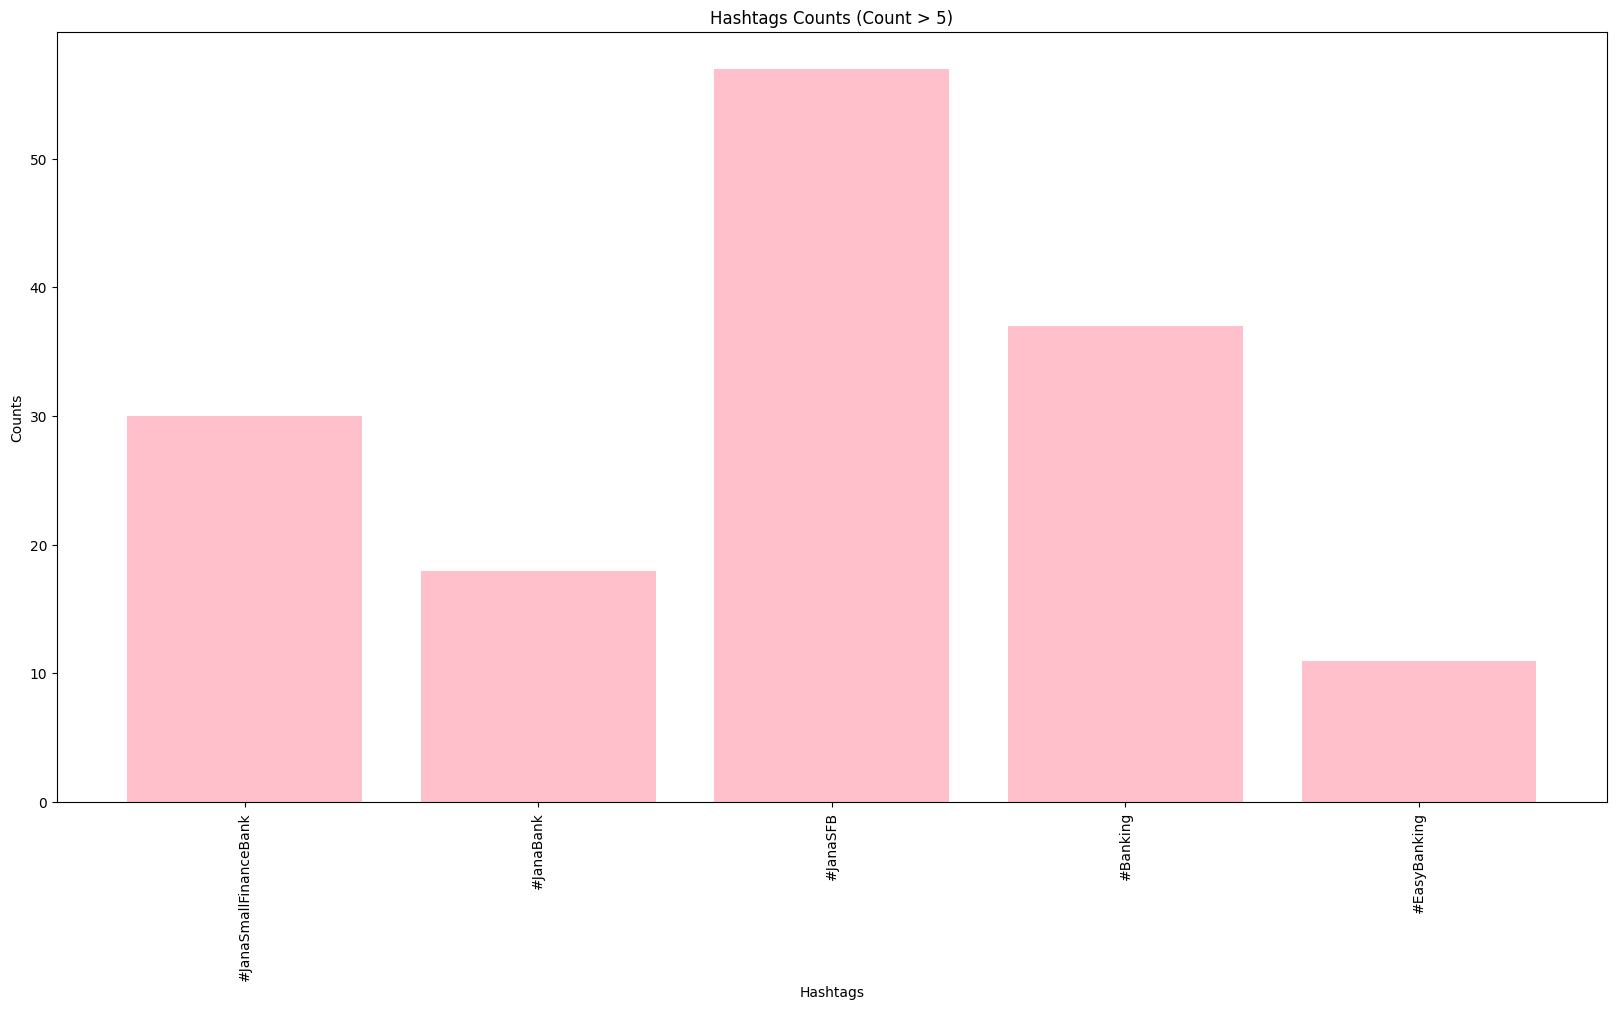

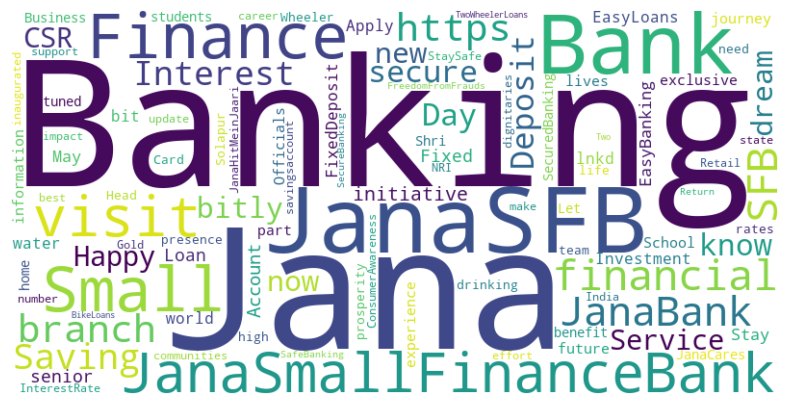

{'#AirtelPaymentsBank': 178, '#DigitalFirst': 9, '#DigitalPayments': 7, '#GFF2023': 13, '#GFF': 13, '#Innovation': 12, '#Launch': 2, '#fastag': 1, '#FaceAuthentication': 5, '#SafestDigitalAccount': 58, '#FinancialInclusion': 10, '#Payments': 10, '#Fintech': 20, '#GlobalFintechFest2023': 12, '#AePS': 2, '#PaymentsBanks': 1, '#DigitalBank': 86, '#LeadersTalk': 2, '#YoungBanker': 1, '#FinancialServices': 3, '#BFSI': 11, '#MarketingLeaders': 1, '#WomenAtBank': 29, '#LeadersSpeak': 3, '#ContentMarketing': 1, '#Banking': 2, '#Security': 1, '#VCCircle': 1, '#InTheNews': 1, '#Profitable': 8, '#FinTech': 1, '#FTX2024': 1, '#FutureOfPayments': 1, '#AirtelSafePay': 45, '#airtelThanks': 51, '#PaymentsSoRewarding': 1, '#Growth': 4, '#SkipTheFraud': 7, '#WorkJourney': 7, '#Diversity': 8, '#Inclusion': 10, '#Womenleaders': 1, '#Campushiring': 1, '#EmpoweringSuccess': 1, '#CareerJourney': 1, '#Dedication': 1, '#GreatPlaceToWork': 24, '#DateWithTech2023': 1, '#FiresideChat': 1, '#B2B': 5, '#Lending': 2

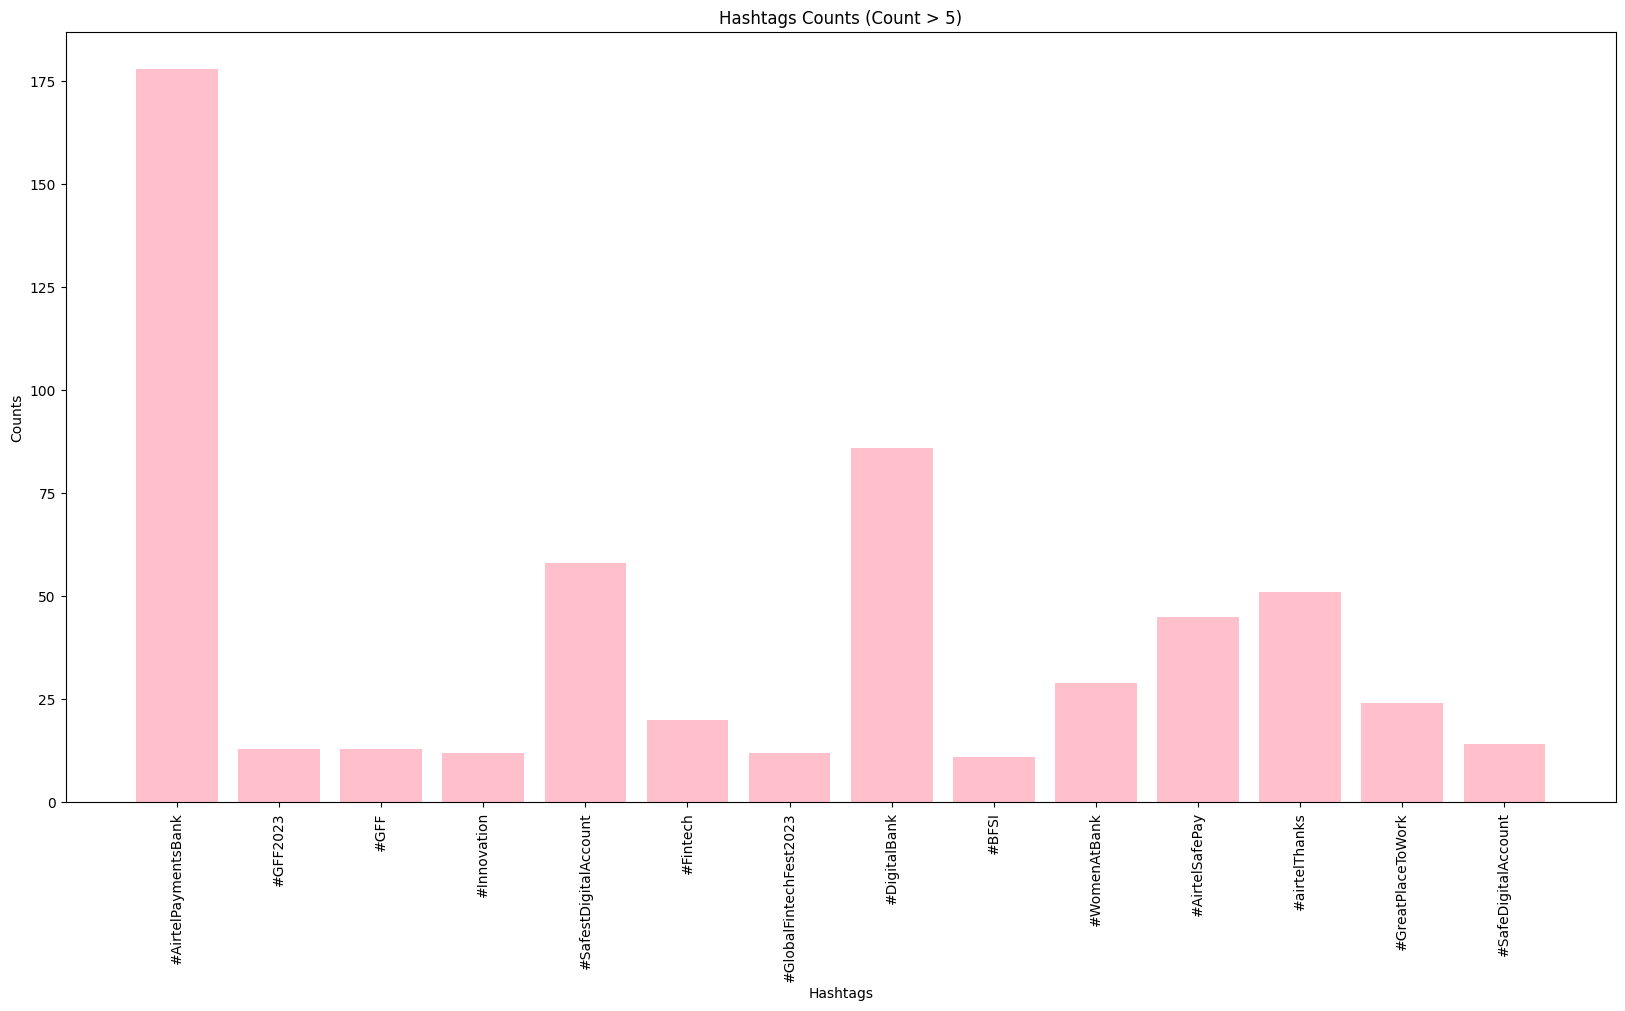

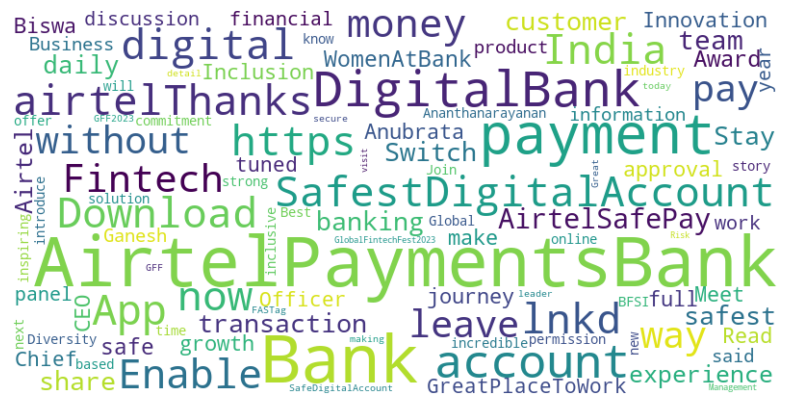

{'#FinoPaymentsBank': 46, '#FikarNot': 46, '#FinoBanker': 38, '#DigitalBanking': 42, '#SecureBanking': 37, '#HarDinFino': 46, '#FinoPay': 42, '#WorldCancerDay': 1, '#CancerAwareness': 1, '#TakeControlOfYourLife': 1, '#quarterlyresults': 1, '#FinoMerchant': 16, '#profitability': 1, '#milestone': 1, '#securebanking': 5, '#RBI': 1, '#HallaBol': 6, '#Finopay': 3, '#RRvOpponent': 3, '#HumAaRaheHain': 6, '#RajhasthanRoyals': 1, '#WinningPerformance': 9, '#ExcitementOverload': 9, '#StayTuned': 9, '#KhushiyonKaKhazana': 9, '#SavingsAccount': 9, '#cricketvideos': 9, '#cricketislife': 9, '#HappyRepublicDay': 1, '#RepublicDay': 1, '#IndianConstitution': 1, '#Insights': 1, '#FutureGoals': 1, '#DataProtectionDay': 1, '#ProtectYourData': 1, '#DataPrivacy': 1, '#ScamAlert': 1, '#NewsArticle': 1, '#WorldRadioDay': 1, '#Entertainment': 1, '#Informative': 1, '#Hubble': 1, '#Partnership': 1, '#News': 1, '#TimesOfIndia': 1, '#startupideas': 1, '#ArticleBlog': 1, '#InvestmentStrategy': 1, '#ETBFSI': 1, '#B

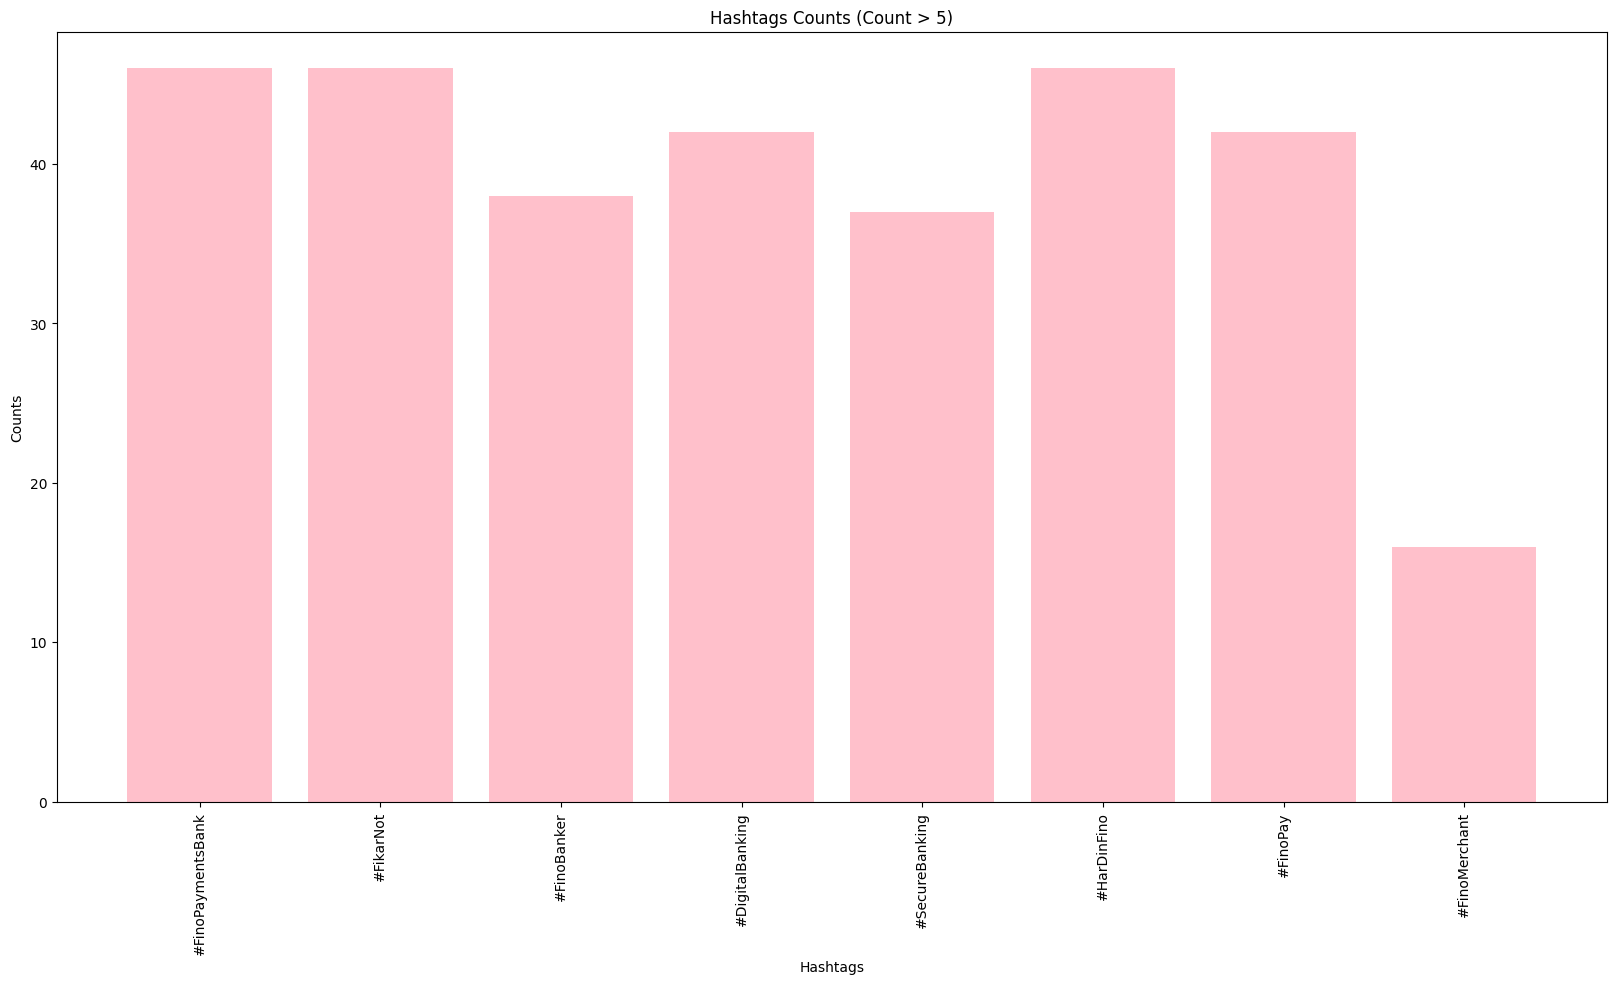

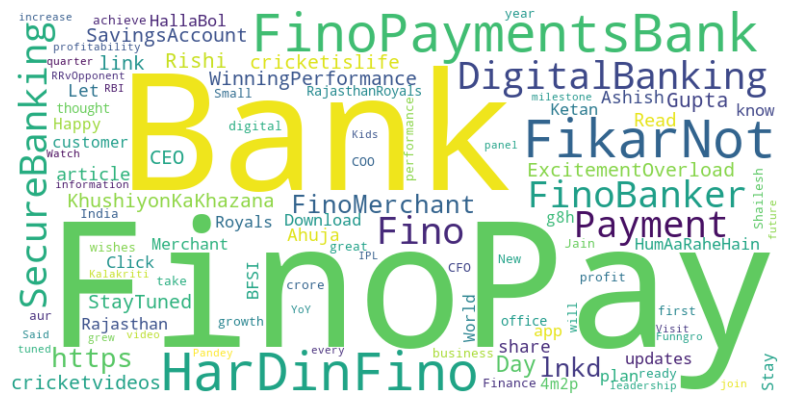

{'#Aapkabankaapkedwaar': 71, '#Bankingatlastmile': 72, '#AntyodayaShramikSurakshaYojana': 1, '#ClickToConvenience': 2, '#IPPBForViksitBharat': 1, '#HappyEaster2023': 1, '#GoodFriday2023': 1, '#BankingAtYourFingertips': 1, '#IPPBMobileBanking': 1, '#IndianEconomy': 1, '#FinancialTransformation': 1, '#BankingRevolution': 1, '#TechnologyDriven': 1, '#CII4NR': 1, '#MeriSarkar': 1, '#PaiPaiSeDeshKiBhalai': 1, '#NariShakti4NewIndia': 1, '#DeshMeinElectronicsKranti': 1, '#NewIndia': 1, '#EidMiladUnNabi': 1, '#LalBahadurShastri': 1, '#NationalUnityDay': 1, '#GuruNanakJayanti': 1, '#DomesticMoneyTransfer': 1, '#Aadhaar': 1, '#WorldWildlifeDay': 1, '#JanjatiyaGauravDiwas': 1, '#WorldPostDay': 1, '#TogetherForTrust': 1, '#DakPay': 1, '#HealthInsurance': 1, '#DigitalLifeCertificate': 1, '#ISRO': 1, '#AdityaL1Mission': 1, '#SuryaNaLaunch': 1, '#SuryaNamaskar': 1, '#FintechRevolution': 1, '#FutureOfFinance': 1, '#GFF2023': 1, '#DigitalBanking': 2, '#PMKisan': 2, '#PMKisanSammanNidhi': 1, '#PMKisan15

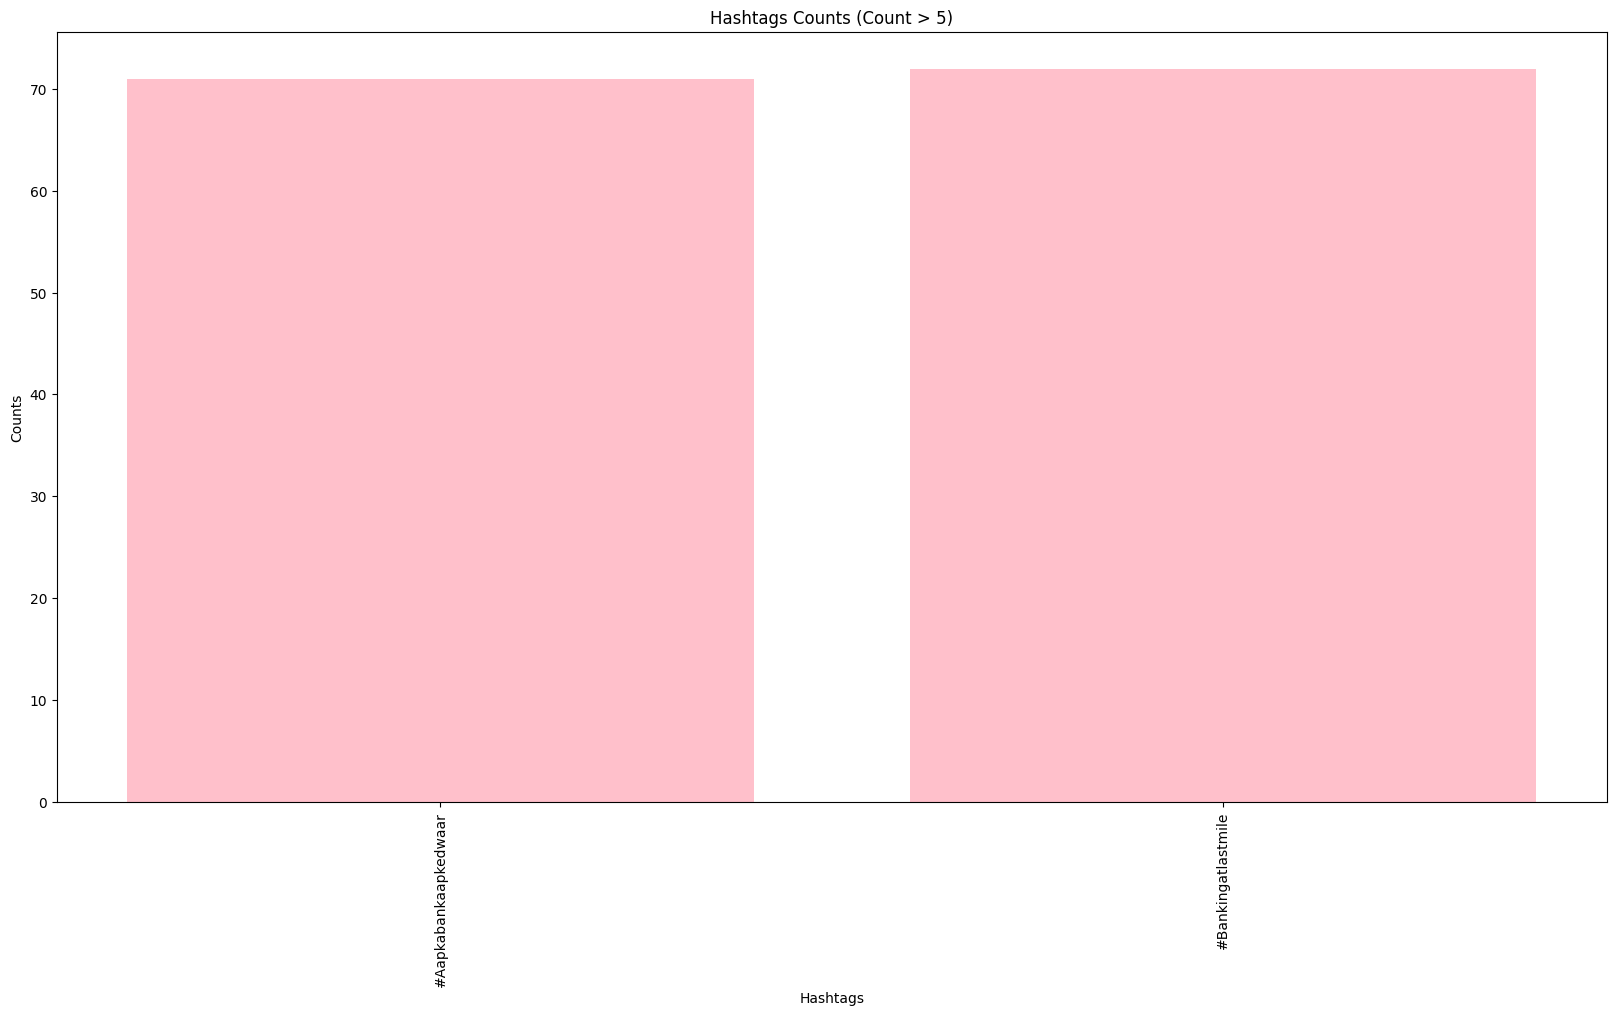

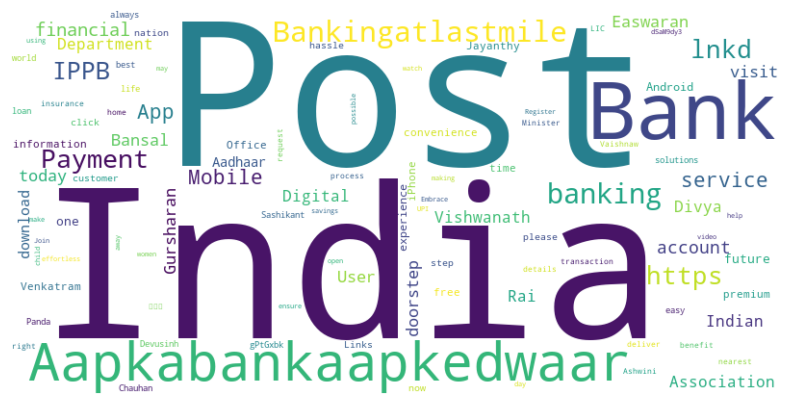

{'#2000rsnote': 1, '#RBI': 1, '#bankofsmiles': 102, '#suryodaybank': 100, '#celebration': 2, '#womensavingsaccount': 1, '#blossomwomensavingsaccount': 1, '#savingsaccount': 5, '#womensday': 1, '#commercialvehicle': 1, '#loans': 7, '#dicgc': 1, '#deposit': 4, '#security': 4, '#recurringdeposits': 1, '#rd': 2, '#event': 1, '#rewards': 1, '#recognition': 1, '#CEO': 1, '#FY23': 1, '#quaterlyresults': 3, '#literacyday': 1, '#education': 1, '#activity': 3, '#wetlandday': 1, '#environment': 1, '#conservation': 1, '#celebrations': 9, '#townhall': 7, '#trichy': 1, '#teambuilding': 7, '#IMC': 1, '#association': 1, '#msme': 1, '#navimumbai': 4, '#conference': 1, '#partnership': 1, '#industryexperts': 1, '#Happinessday': 1, '#Happiness': 1, '#lifeinsurance': 2, '#Banking': 1, '#Digitalbanking': 1, '#banking': 1, '#digitalbanking': 1, '#solapur': 1, '#Finance': 1, '#Q4FY23': 1, '#recruitment': 5, '#jobopening': 7, '#jobsearch': 5, '#nowhiring': 7, '#mortgages': 1, '#securedloans': 1, '#homeloans': 

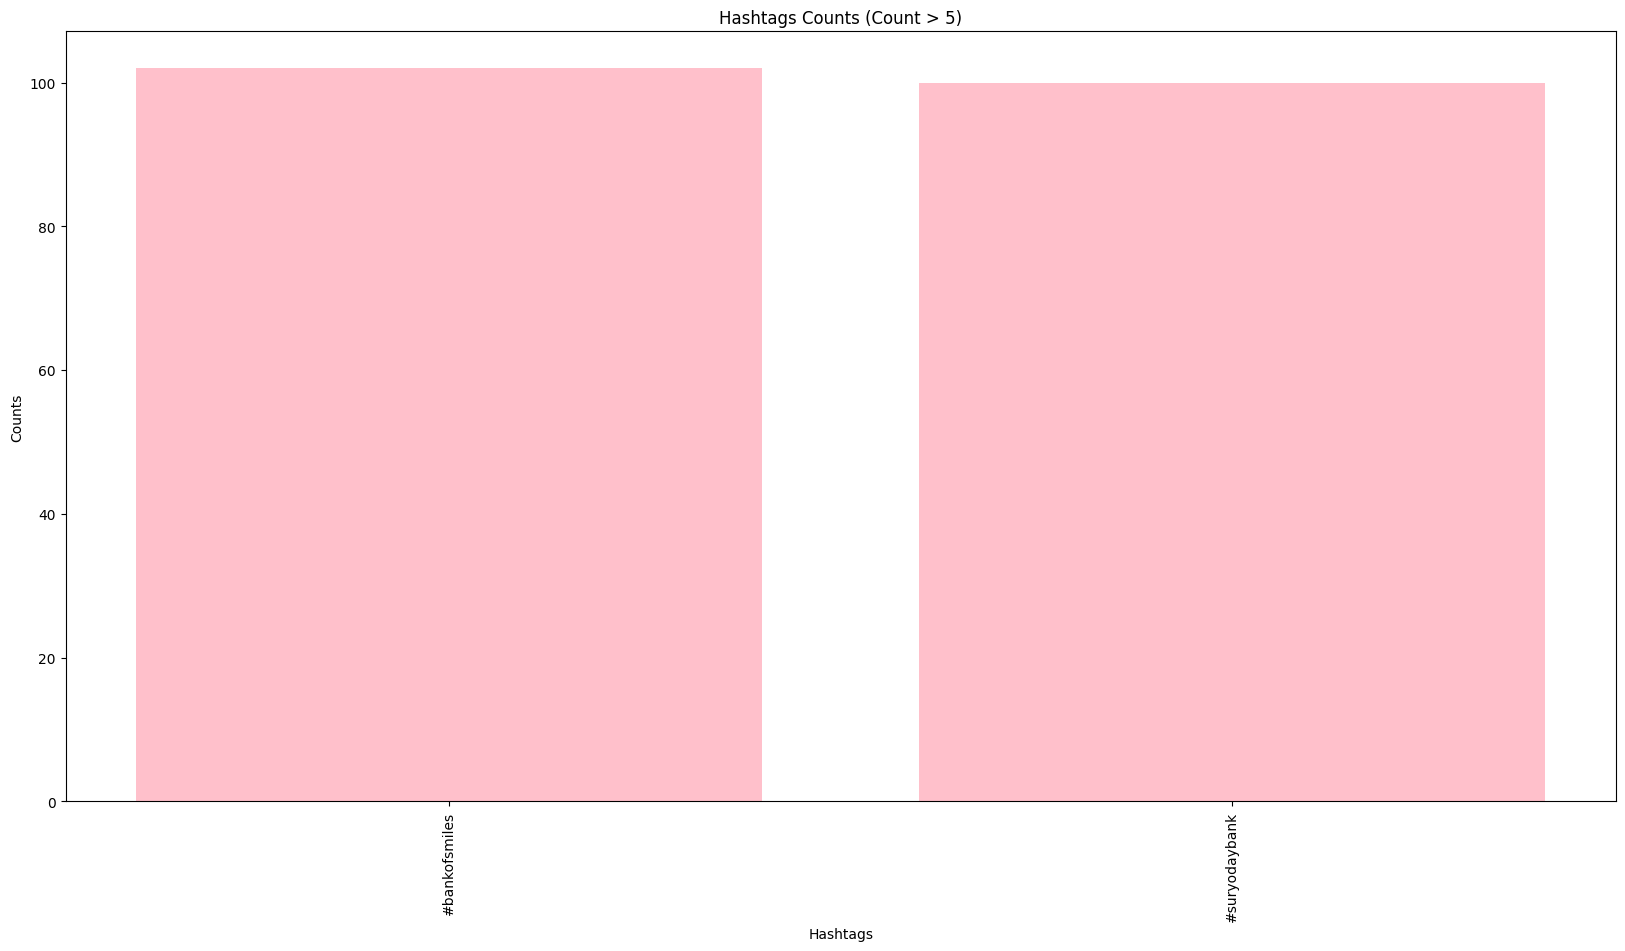

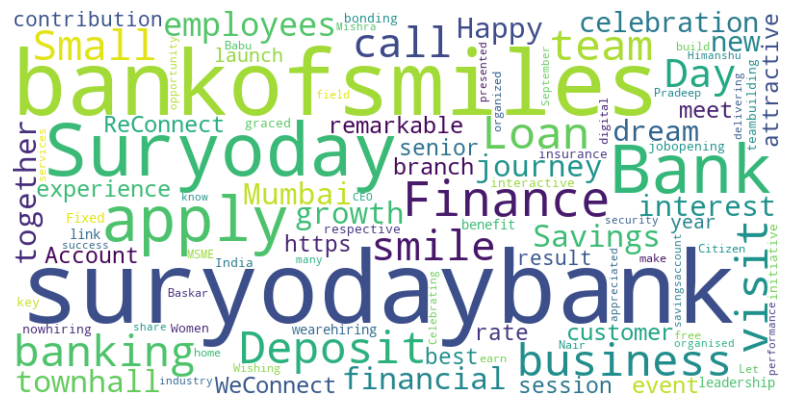

{'#KeyHighlights': 1, '#Budget2024': 1, '#InterimUnionBudget': 1, '#Finance': 1, '#AUSmallFinanceBank': 99, '#FakeJobScam': 1, '#BeSafe': 1, '#StayAlert': 4, '#scamalert': 1, '#staysafe': 3, '#BadlaavHumseHai': 35, '#ONDC': 1, '#SafeBanking': 7, '#DiversityandInclusion': 1, '#TeamBuilding': 1, '#workculture': 3, '#greatplace': 1, '#investments': 1, '#AUCreditCard': 1, '#savings': 1, '#lowmarkup': 1, '#transactions': 1, '#2000Note': 1, '#RBI': 2, '#WorldPasswordDay': 1, '#password': 1, '#microaggresions': 1, '#smallactions': 1, '#bigimpacts': 1, '#workenvironment': 1, '#inclusivity': 2, '#performance': 1, '#productivity': 1, '#diversity': 2, '#inclusion': 1, '#CyberSecurity': 2, '#environment': 1, '#teamwork': 1, '#thecrowningsymbolofsuccess': 1, '#launchingsoon': 1, '#ausmallfinancebank': 6, '#creditcard': 6, '#PlanetFirst': 3, '#Sustainability': 4, '#ForeverBank': 2, '#DataProtectionDay': 1, '#Passwors': 1, '#Storng': 1, '#Safety': 1, '#BadlaavHumseHain': 1, '#MenstrualLeave': 1, '#AU

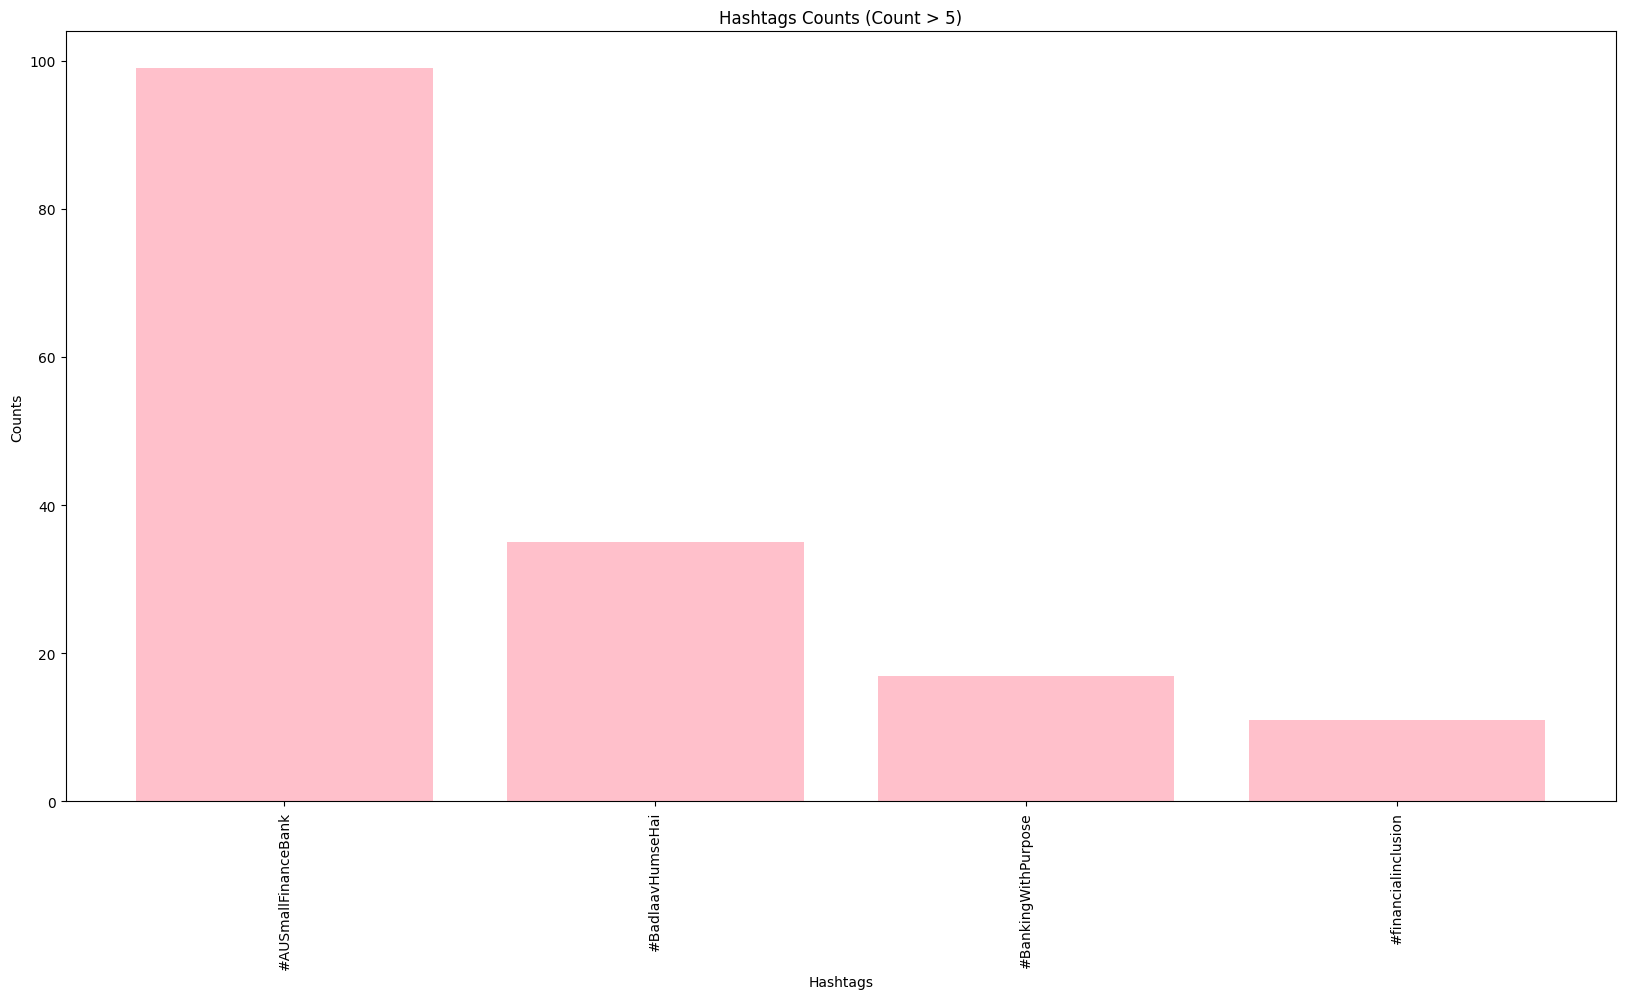

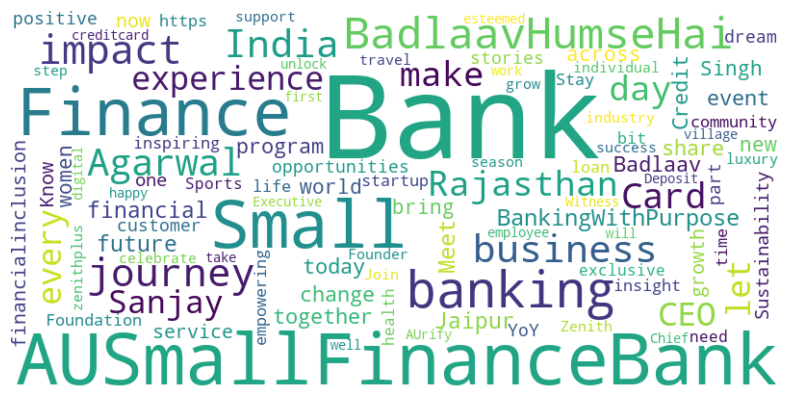

In [105]:
analyze_hashtags(dataset_jsb)
analyze_hashtags(dataset_apb)
analyze_hashtags(dataset_fino)
analyze_hashtags(dataset_ippb)
analyze_hashtags(dataset_ssb)
analyze_hashtags(dataset_au)

In [106]:
dataset.head()

,authorFullName,commentsCount,image,isRepost,likesCount,postedAtISO,text,timeSincePosted,title,url,urn,day,hour
0,Airtel Payments Bank,9,https://media.licdn.com/dms/image/D4D22AQFGNLA...,False,287,2023-09-07 10:53:47.693000+00:00,#AirtelPaymentsBank is the first bank in India...,6mo,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7105503413689331712,Thursday,10
1,Airtel Payments Bank,3,NaN,False,155,2023-09-05 08:09:56.464000+00:00,Here’s a glimpse of #AirtelPaymentsBank- India...,6mo,Face Authentication For AePS,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7104737402795024384,Tuesday,8
2,Airtel Payments Bank,5,https://media.licdn.com/dms/image/D4D22AQGpVAb...,False,230,2023-09-06 12:40:25.601000+00:00,"“With the rise of digital India, and smartphon...",6mo,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7105167860594802688,Wednesday,12
3,Airtel Payments Bank,4,NaN,False,229,2023-11-24 10:15:34.620000+00:00,"Our MD and CEO, Anubrata Biswas, had an intera...",3mo,Anubrata Biswas at IMT Ghaziabad,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7133760049360887808,Friday,10
4,Airtel Payments Bank,0,NaN,False,68,2023-11-24 08:05:03.108000+00:00,“Customers of tomorrow are priortising simplic...,3mo,Ganesh Ananthanarayanan at the #DATE,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7133727201618780160,Friday,8


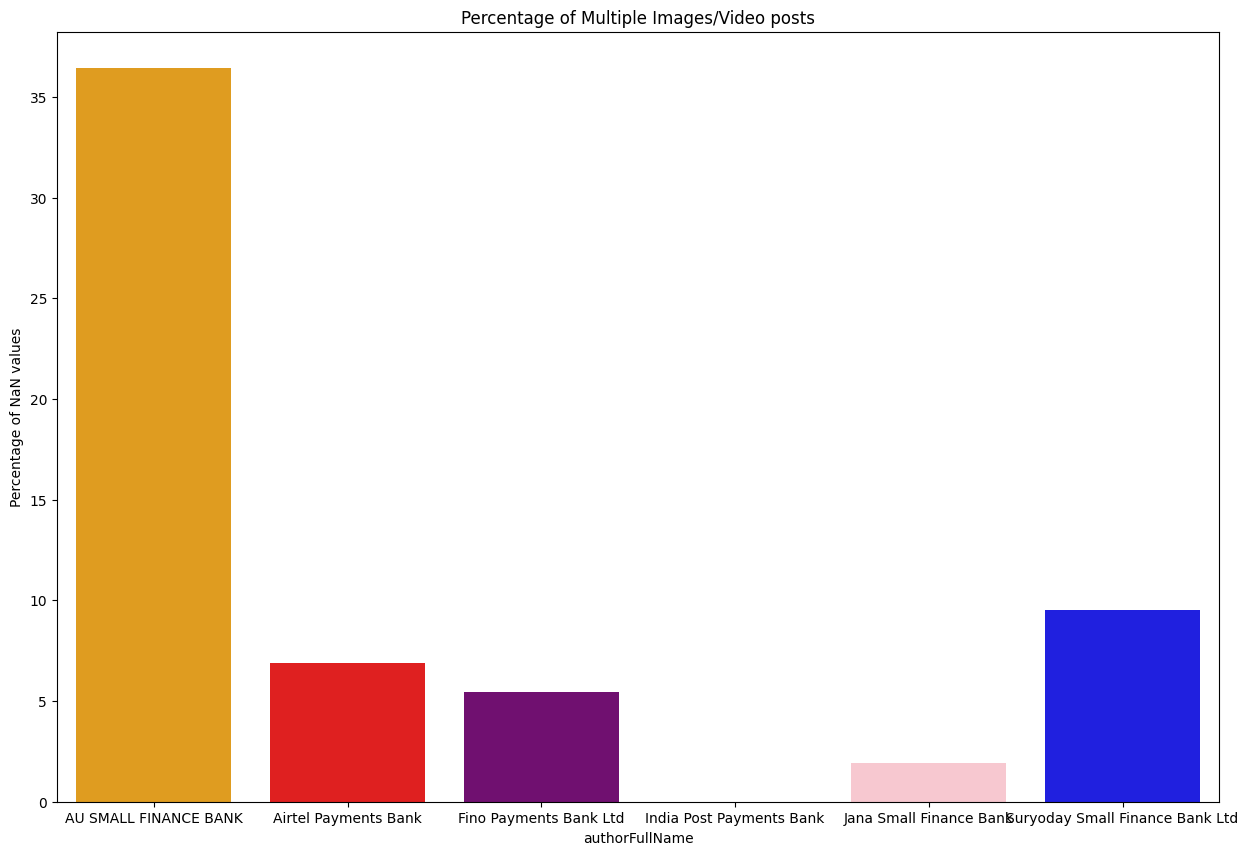

In [107]:
nan_percentage = dataset.groupby('authorFullName')['image'].apply(lambda x: x.isna().mean() * 100).reset_index(name='nan_percentage')

# Plotting a bar graph
plt.figure(figsize=(15, 10))
sns.barplot(x='authorFullName', y='nan_percentage', data=nan_percentage,palette=['orange','red','purple','maroon','pink','blue'])
plt.title('Percentage of Multiple Images/Video posts')
plt.xlabel('authorFullName')
plt.ylabel('Percentage of NaN values')
plt.show()

In [108]:
dataset_au[dataset_au['image'].isnull()]['url'].iloc[9]


'https://www.linkedin.com/feed/update/urn:li:activity:7095987953012793344?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7095987953012793344%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29'

In [109]:
dataset.head()

,authorFullName,commentsCount,image,isRepost,likesCount,postedAtISO,text,timeSincePosted,title,url,urn,day,hour
0,Airtel Payments Bank,9,https://media.licdn.com/dms/image/D4D22AQFGNLA...,False,287,2023-09-07 10:53:47.693000+00:00,#AirtelPaymentsBank is the first bank in India...,6mo,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7105503413689331712,Thursday,10
1,Airtel Payments Bank,3,NaN,False,155,2023-09-05 08:09:56.464000+00:00,Here’s a glimpse of #AirtelPaymentsBank- India...,6mo,Face Authentication For AePS,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7104737402795024384,Tuesday,8
2,Airtel Payments Bank,5,https://media.licdn.com/dms/image/D4D22AQGpVAb...,False,230,2023-09-06 12:40:25.601000+00:00,"“With the rise of digital India, and smartphon...",6mo,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7105167860594802688,Wednesday,12
3,Airtel Payments Bank,4,NaN,False,229,2023-11-24 10:15:34.620000+00:00,"Our MD and CEO, Anubrata Biswas, had an intera...",3mo,Anubrata Biswas at IMT Ghaziabad,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7133760049360887808,Friday,10
4,Airtel Payments Bank,0,NaN,False,68,2023-11-24 08:05:03.108000+00:00,“Customers of tomorrow are priortising simplic...,3mo,Ganesh Ananthanarayanan at the #DATE,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7133727201618780160,Friday,8


In [110]:
dataset.head()

,authorFullName,commentsCount,image,isRepost,likesCount,postedAtISO,text,timeSincePosted,title,url,urn,day,hour
0,Airtel Payments Bank,9,https://media.licdn.com/dms/image/D4D22AQFGNLA...,False,287,2023-09-07 10:53:47.693000+00:00,#AirtelPaymentsBank is the first bank in India...,6mo,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7105503413689331712,Thursday,10
1,Airtel Payments Bank,3,NaN,False,155,2023-09-05 08:09:56.464000+00:00,Here’s a glimpse of #AirtelPaymentsBank- India...,6mo,Face Authentication For AePS,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7104737402795024384,Tuesday,8
2,Airtel Payments Bank,5,https://media.licdn.com/dms/image/D4D22AQGpVAb...,False,230,2023-09-06 12:40:25.601000+00:00,"“With the rise of digital India, and smartphon...",6mo,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7105167860594802688,Wednesday,12
3,Airtel Payments Bank,4,NaN,False,229,2023-11-24 10:15:34.620000+00:00,"Our MD and CEO, Anubrata Biswas, had an intera...",3mo,Anubrata Biswas at IMT Ghaziabad,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7133760049360887808,Friday,10
4,Airtel Payments Bank,0,NaN,False,68,2023-11-24 08:05:03.108000+00:00,“Customers of tomorrow are priortising simplic...,3mo,Ganesh Ananthanarayanan at the #DATE,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7133727201618780160,Friday,8


In [115]:
def plot_likes_count_by_day(data,color):
    grouped_data = data.groupby('day')['likesCount'].median().reset_index()
    plt.bar(grouped_data['day'], grouped_data['likesCount'], color=color)
    plt.title('LikesCount by Day')
    plt.xlabel('Day')
    plt.ylabel('Total LikesCount')
    plt.show()
    grouped_data = data.groupby('hour')['likesCount'].mean().reset_index()
    plt.bar(grouped_data['hour'], grouped_data['likesCount'], color=color)
    plt.title('LikesCount by Day')
    plt.xlabel('Day')
    plt.ylabel('Total LikesCount')
    plt.show()

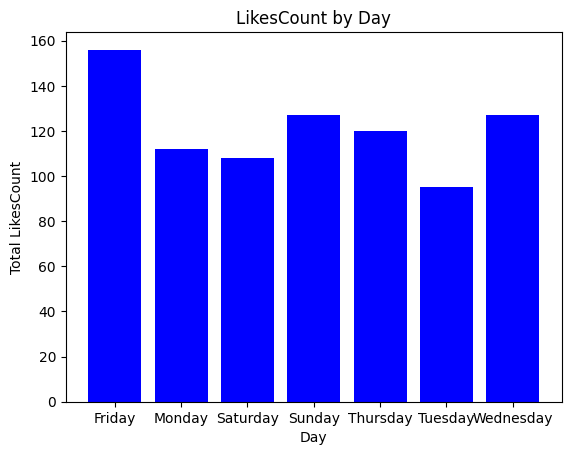

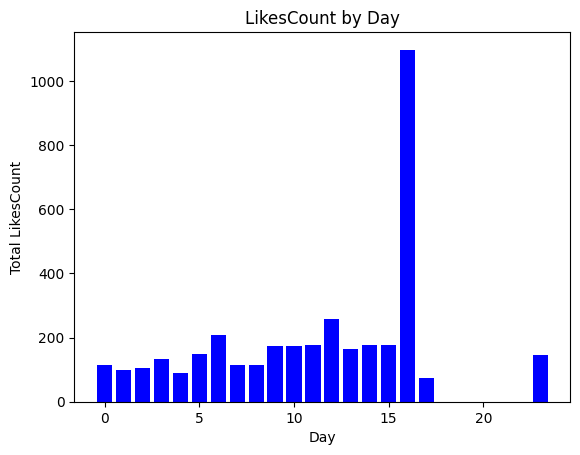

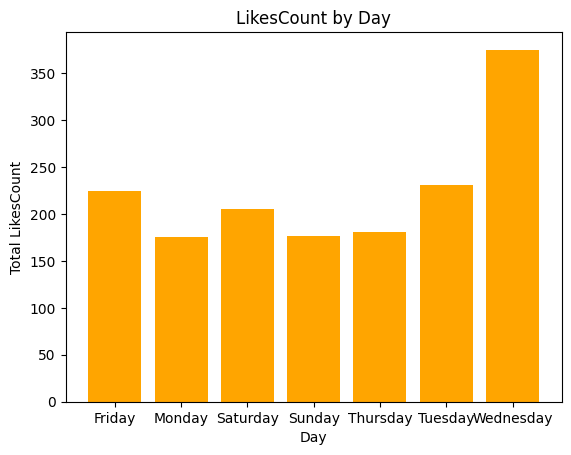

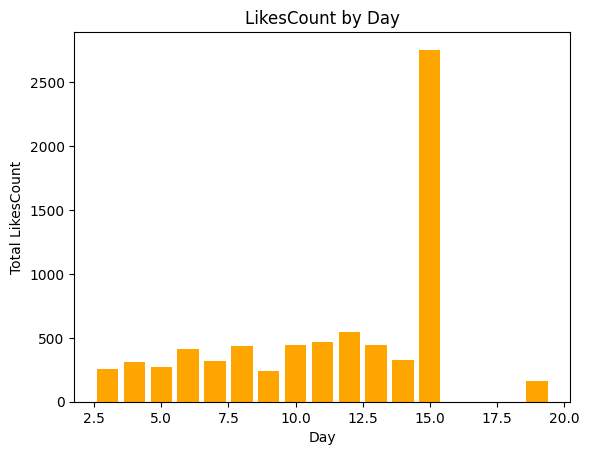

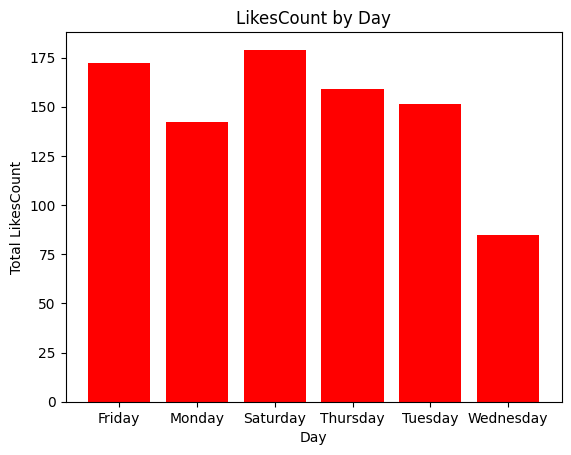

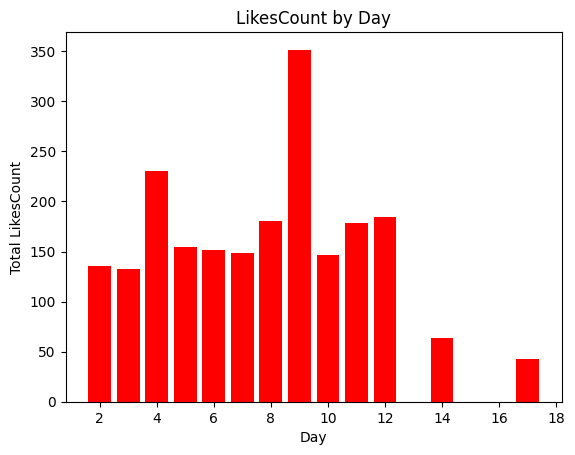

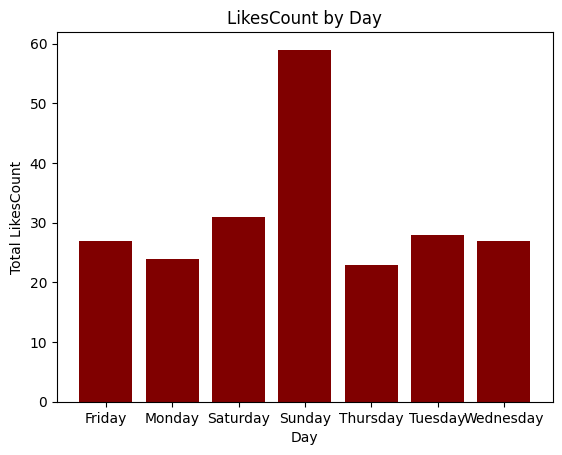

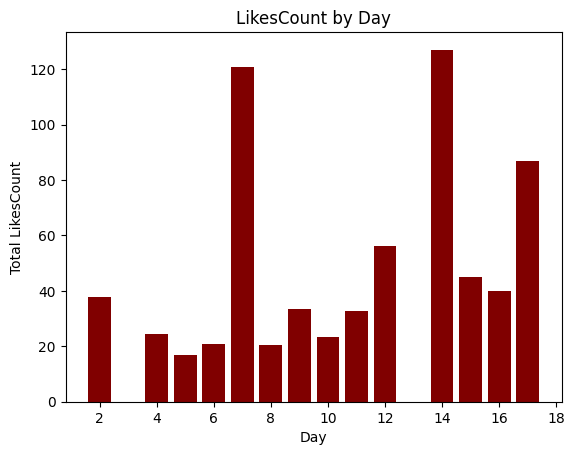

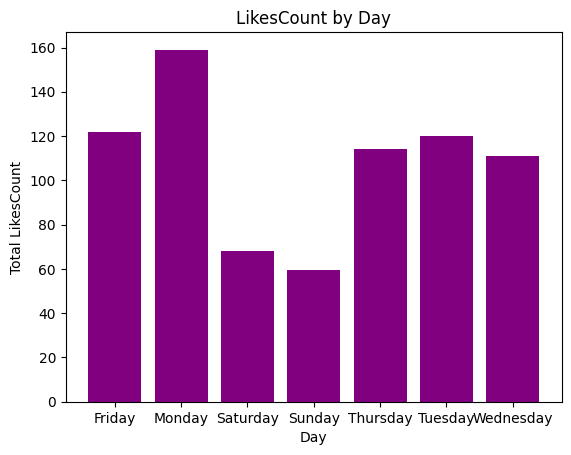

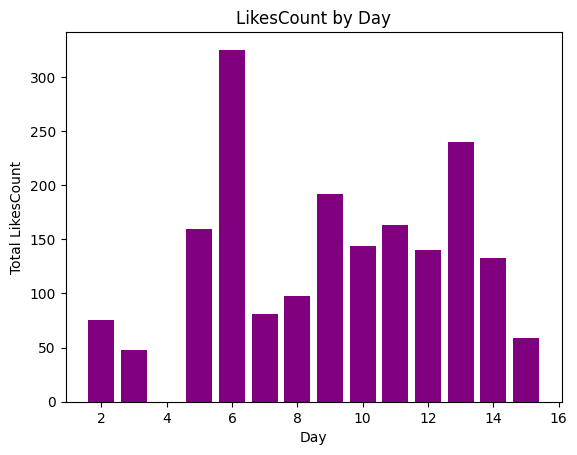

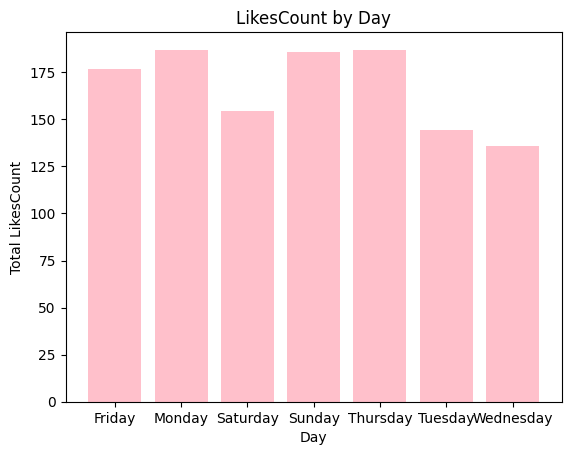

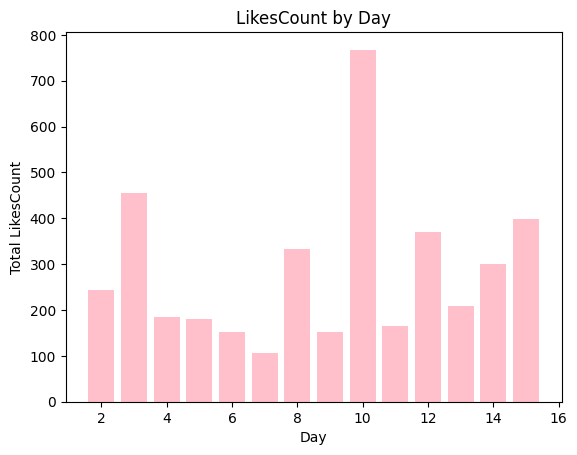

In [116]:
plot_likes_count_by_day(dataset_ssb,'blue')
plot_likes_count_by_day(dataset_au,'orange')
plot_likes_count_by_day(dataset_apb,'red')
plot_likes_count_by_day(dataset_ippb,'maroon')
plot_likes_count_by_day(dataset_fino,'purple')
plot_likes_count_by_day(dataset_jsb,'pink')

In [117]:
dataset.head()

,authorFullName,commentsCount,image,isRepost,likesCount,postedAtISO,text,timeSincePosted,title,url,urn,day,hour
0,Airtel Payments Bank,9,https://media.licdn.com/dms/image/D4D22AQFGNLA...,False,287,2023-09-07 10:53:47.693000+00:00,#AirtelPaymentsBank is the first bank in India...,6mo,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7105503413689331712,Thursday,10
1,Airtel Payments Bank,3,NaN,False,155,2023-09-05 08:09:56.464000+00:00,Here’s a glimpse of #AirtelPaymentsBank- India...,6mo,Face Authentication For AePS,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7104737402795024384,Tuesday,8
2,Airtel Payments Bank,5,https://media.licdn.com/dms/image/D4D22AQGpVAb...,False,230,2023-09-06 12:40:25.601000+00:00,"“With the rise of digital India, and smartphon...",6mo,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7105167860594802688,Wednesday,12
3,Airtel Payments Bank,4,NaN,False,229,2023-11-24 10:15:34.620000+00:00,"Our MD and CEO, Anubrata Biswas, had an intera...",3mo,Anubrata Biswas at IMT Ghaziabad,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7133760049360887808,Friday,10
4,Airtel Payments Bank,0,NaN,False,68,2023-11-24 08:05:03.108000+00:00,“Customers of tomorrow are priortising simplic...,3mo,Ganesh Ananthanarayanan at the #DATE,https://www.linkedin.com/feed/update/urn:li:ac...,urn:li:activity:7133727201618780160,Friday,8
